In [1]:
import numpy
import gwpy
%matplotlib inline
import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.waveform import get_td_waveform
from pycbc.filter import matched_filter
from pycbc.filter import sigma

In [2]:
# Download the challenge set files
from pycbc.frame import read_frame
import urllib

def get_file(fname):
    url = "https://www.gw-openscience.org/s/workshop3/challenge/{}"
    url = url.format(fname)
    urllib.request.urlretrieve(url, fname)
    print('Getting : {}'.format(url))

files = ['challenge1.gwf', 'challenge2.gwf'] #Manca challenge3.gwf

for fname in files:
    get_file(fname)
    

# An example of how to read the data from these files:
file_name = "challenge1.gwf"

# LOSC bulk data typically uses the same convention for internal channels names
# Strain is typically IFO:LOSC-STRAIN, where IFO can be H1/L1/V1.
channel_name = "H1:CHALLENGE1"

ts = read_frame(file_name, channel_name)

Getting : https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Getting : https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf


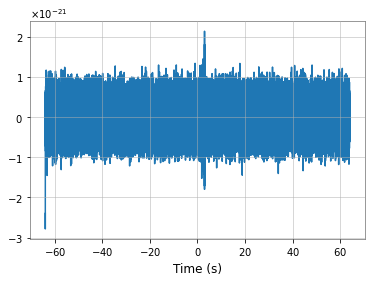

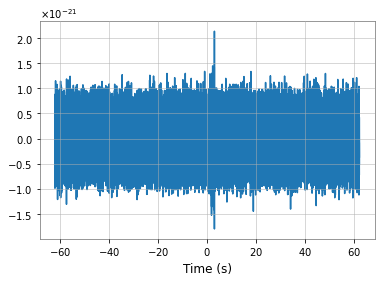

In [3]:
# Remove the low frequency content and downsample the data to 2048Hz
ts = highpass(ts, 15.0)
ts = resample_to_delta_t(ts, 1.0/2048)

pylab.plot(ts.sample_times, ts)
pylab.xlabel('Time (s)')
pylab.show()

# Remove 2 seconds of data from both the beginning and end
conditioned = ts.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [4]:
dt = conditioned.sample_times[-1] - conditioned.sample_times[0]
print("Data duration = ", dt, "s")

Data duration =  123.99951171875 s


In [18]:
from gwpy.timeseries import TimeSeries
ldata = TimeSeries.read(file_name, channel_name)

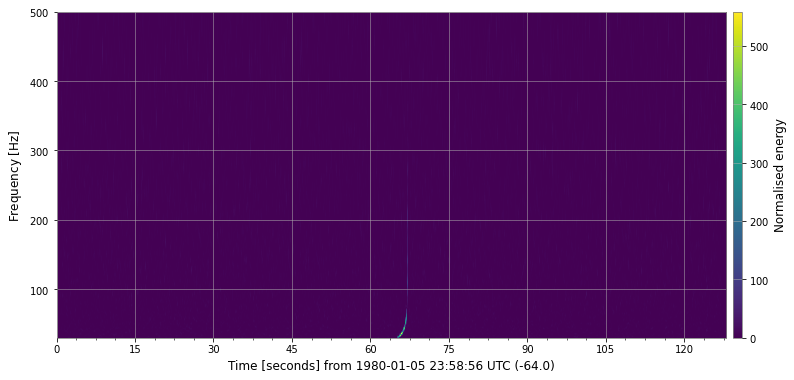

In [25]:
hq = ldata.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")